In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For evaluating models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# For deep learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow import keras

# xgboost
import xgboost as xgb


In [45]:
ranks_path = 'ranking.txt'

with open(ranks_path, 'r') as file:
    data = file.readlines()

data = [line.strip() for line in data]

rank_df = pd.DataFrame(data, columns=["player"])
rank_df['rank'] = range(1, len(data) + 1)
rank_df = df[['rank', 'player']]
rank_df


,rank,player
0,1,Chovy
1,2,Zeka
2,3,Viper
3,4,Delight
4,5,Canyon
5,6,Kiin
6,7,Zeus
7,8,Peanut
8,9,Caps
9,10,Peyz


In [46]:
raw_path = "OraclesElixirLoLData2024.csv"
raw_df = pd.read_csv(raw_path, low_memory=False)
raw_df

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114283,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,200.0,716.0,2609.0,14.0,1.0,6.0,0.0,1.0,2.0,3.0
114284,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,264.0,-445.0,1274.0,-28.0,1.0,5.0,0.0,1.0,2.0,0.0
114285,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,36.0,151.0,1043.0,8.0,1.0,5.0,2.0,0.0,3.0,1.0
114286,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,862.0,-2295.0,-7637.0,8.0,4.0,9.0,9.0,9.0,23.0,4.0


In [47]:
worlds_df = raw_df[raw_df['league'] == 'WLDs']
worlds_df

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
100020,11363-11363_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11363,WLDs,2024,NaN,0,2024-08-31 08:58:51,1,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100021,11363-11363_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11363,WLDs,2024,NaN,0,2024-08-31 08:58:51,1,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100022,11363-11363_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11363,WLDs,2024,NaN,0,2024-08-31 08:58:51,1,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100023,11363-11363_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11363,WLDs,2024,NaN,0,2024-08-31 08:58:51,1,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100024,11363-11363_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11363,WLDs,2024,NaN,0,2024-08-31 08:58:51,1,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114079,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,259.0,-1408.0,564.0,-14.0,1.0,0.0,1.0,3.0,0.0,0.0
114080,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,250.0,892.0,-49.0,35.0,1.0,1.0,0.0,0.0,0.0,0.0
114081,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,37.0,230.0,-290.0,-8.0,0.0,2.0,1.0,0.0,2.0,2.0
114082,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,967.0,-592.0,-846.0,-35.0,3.0,7.0,2.0,2.0,5.0,3.0


In [48]:
worlds_df = worlds_df[worlds_df['datacompleteness'] == 'complete']
worlds_df

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
102948,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,143.0,824.0,-210.0,24.0,3.0,0.0,3.0,1.0,4.0,2.0
102949,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,146.0,968.0,2146.0,36.0,1.0,3.0,2.0,0.0,7.0,0.0
102950,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,281.0,-1648.0,-1133.0,-47.0,1.0,2.0,2.0,5.0,0.0,0.0
102951,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,247.0,230.0,1166.0,30.0,0.0,0.0,2.0,2.0,5.0,1.0
102952,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,36.0,191.0,838.0,-5.0,0.0,3.0,0.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114079,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,259.0,-1408.0,564.0,-14.0,1.0,0.0,1.0,3.0,0.0,0.0
114080,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,250.0,892.0,-49.0,35.0,1.0,1.0,0.0,0.0,0.0,0.0
114081,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,37.0,230.0,-290.0,-8.0,0.0,2.0,1.0,0.0,2.0,2.0
114082,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,967.0,-592.0,-846.0,-35.0,3.0,7.0,2.0,2.0,5.0,3.0


In [49]:
print(worlds_df.columns)

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat25', 'golddiffat25', 'xpdiffat25', 'csdiffat25', 'killsat25',
       'assistsat25', 'deathsat25', 'opp_killsat25', 'opp_assistsat25',
       'opp_deathsat25'],
      dtype='object', length=161)


In [50]:
columns_with_at = [col for col in worlds_df.columns if 'at' in col]
print(columns_with_at)

['datacompleteness', 'date', 'patch', 'deaths', 'teamdeaths', 'turretplates', 'opp_turretplates', 'damagemitigatedperminute', 'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15', 'goldat20', 'xpat20', 'csat20', 'opp_goldat20', 'opp_xpat20', 'opp_csat20', 'golddiffat20', 'xpdiffat20', 'csdiffat20', 'killsat20', 'assistsat20', 'deathsat20', 'opp_killsat20', 'opp_assistsat20', 'opp_deathsat20', 'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25', 'golddiffat25', 'xpdiffat25', 'csdiffat25', 'killsat25', 'assistsat25', 'deathsat25', 'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25']


In [51]:
columns_with_at.remove('deaths')
columns_with_at.remove('damagemitigatedperminute')
print(columns_with_at)

['datacompleteness', 'date', 'patch', 'teamdeaths', 'turretplates', 'opp_turretplates', 'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15', 'goldat20', 'xpat20', 'csat20', 'opp_goldat20', 'opp_xpat20', 'opp_csat20', 'golddiffat20', 'xpdiffat20', 'csdiffat20', 'killsat20', 'assistsat20', 'deathsat20', 'opp_killsat20', 'opp_assistsat20', 'opp_deathsat20', 'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25', 'golddiffat25', 'xpdiffat25', 'csdiffat25', 'killsat25', 'assistsat25', 'deathsat25', 'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25']


In [52]:
worlds_df = worlds_df[~worlds_df['participantid'].isin([100, 200])]
worlds_df

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
102948,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,143.0,824.0,-210.0,24.0,3.0,0.0,3.0,1.0,4.0,2.0
102949,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,146.0,968.0,2146.0,36.0,1.0,3.0,2.0,0.0,7.0,0.0
102950,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,281.0,-1648.0,-1133.0,-47.0,1.0,2.0,2.0,5.0,0.0,0.0
102951,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,247.0,230.0,1166.0,30.0,0.0,0.0,2.0,2.0,5.0,1.0
102952,LOLTMNT03_146711,complete,NaN,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,...,36.0,191.0,838.0,-5.0,0.0,3.0,0.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114077,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,224.0,483.0,245.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0
114078,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,162.0,395.0,376.0,17.0,0.0,2.0,1.0,0.0,3.0,0.0
114079,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,259.0,-1408.0,564.0,-14.0,1.0,0.0,1.0,3.0,0.0,0.0
114080,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,250.0,892.0,-49.0,35.0,1.0,1.0,0.0,0.0,0.0,0.0


In [53]:
worlds_df.drop(columns=columns_with_at, inplace=True)
worlds_df

/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_68174/2096636389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worlds_df.drop(columns=columns_with_at, inplace=True)


,gameid,url,league,year,split,playoffs,game,participantid,side,position,...,earnedgoldshare,goldspent,gspd,gpr,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm
102948,LOLTMNT03_146711,NaN,WLDs,2024,NaN,0,1,1,Blue,top,...,0.176899,14625,NaN,NaN,262.0,256.0,6,NaN,NaN,6.1623
102949,LOLTMNT03_146711,NaN,WLDs,2024,NaN,0,1,2,Blue,jng,...,0.191579,13575,NaN,NaN,243.0,33.0,210,NaN,NaN,5.7154
102950,LOLTMNT03_146711,NaN,WLDs,2024,NaN,0,1,3,Blue,mid,...,0.236198,15675,NaN,NaN,364.0,335.0,29,NaN,NaN,8.5613
102951,LOLTMNT03_146711,NaN,WLDs,2024,NaN,0,1,4,Blue,bot,...,0.287781,16625,NaN,NaN,484.0,428.0,56,NaN,NaN,11.3838
102952,LOLTMNT03_146711,NaN,WLDs,2024,NaN,0,1,5,Blue,sup,...,0.107543,10350,NaN,NaN,48.0,48.0,0,NaN,NaN,1.1290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114077,LOLTMNT05_90307,NaN,WLDs,2024,NaN,0,5,6,Red,top,...,0.209544,12600,NaN,NaN,282.0,276.0,6,NaN,NaN,8.7532
114078,LOLTMNT05_90307,NaN,WLDs,2024,NaN,0,5,7,Red,jng,...,0.195409,11050,NaN,NaN,214.0,31.0,183,NaN,NaN,6.6425
114079,LOLTMNT05_90307,NaN,WLDs,2024,NaN,0,5,8,Red,mid,...,0.246224,13250,NaN,NaN,311.0,308.0,3,NaN,NaN,9.6534
114080,LOLTMNT05_90307,NaN,WLDs,2024,NaN,0,5,9,Red,bot,...,0.267778,14255,NaN,NaN,374.0,337.0,37,NaN,NaN,11.6089


In [56]:
worlds_df.dropna(axis=1, inplace=True)
worlds_df

/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_68174/495308829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worlds_df.dropna(axis=1, inplace=True)


,gameid,league,year,playoffs,game,participantid,side,position,playername,playerid,...,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,cspm
102948,LOLTMNT03_146711,WLDs,2024,0,1,1,Blue,top,Zeus,oe:player:98dd15c330fb5abb4508347265a7f76,...,1.2230,14626,9146,215.1156,0.176899,14625,262.0,256.0,6,6.1623
102949,LOLTMNT03_146711,WLDs,2024,0,1,2,Blue,jng,Oner,oe:player:f8b68f268106124fc4bc1c946adc9b0,...,1.8111,15385,9905,232.9675,0.191579,13575,243.0,33.0,210,5.7154
102950,LOLTMNT03_146711,WLDs,2024,0,1,3,Blue,mid,Faker,oe:player:e1edfc5cea461399a63cb813cf795cc,...,0.7997,17692,12212,287.2285,0.236198,15675,364.0,335.0,29,8.5613
102951,LOLTMNT03_146711,WLDs,2024,0,1,4,Blue,bot,Gumayusi,oe:player:c7319736816efe935787b4381c6f321,...,1.1760,20359,14879,349.9569,0.287781,16625,484.0,428.0,56,11.3838
102952,LOLTMNT03_146711,WLDs,2024,0,1,5,Blue,sup,Keria,oe:player:db79ce6ad35451c938fbe2995dabd37,...,5.3626,11040,5560,130.7722,0.107543,10350,48.0,48.0,0,1.1290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114077,LOLTMNT05_90307,WLDs,2024,0,5,6,Red,top,Zeus,oe:player:98dd15c330fb5abb4508347265a7f76,...,1.2416,12891,8672,269.1774,0.209544,12600,282.0,276.0,6,8.7532
114078,LOLTMNT05_90307,WLDs,2024,0,5,7,Red,jng,Oner,oe:player:f8b68f268106124fc4bc1c946adc9b0,...,1.4899,12306,8087,251.0191,0.195409,11050,214.0,31.0,183,6.6425
114079,LOLTMNT05_90307,WLDs,2024,0,5,8,Red,mid,Faker,oe:player:e1edfc5cea461399a63cb813cf795cc,...,0.7450,14409,10190,316.2959,0.246224,13250,311.0,308.0,3,9.6534
114080,LOLTMNT05_90307,WLDs,2024,0,5,9,Red,bot,Gumayusi,oe:player:c7319736816efe935787b4381c6f321,...,0.9312,15301,11082,343.9834,0.267778,14255,374.0,337.0,37,11.6089


In [57]:
print(worlds_df.columns)

Index(['gameid', 'league', 'year', 'playoffs', 'game', 'participantid', 'side',
       'position', 'playername', 'playerid', 'teamname', 'teamid', 'champion',
       'ban1', 'ban2', 'ban3', 'ban4', 'gamelength', 'result', 'kills',
       'deaths', 'assists', 'teamkills', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'firstblood', 'firstbloodkill',
       'firstbloodassist', 'firstbloodvictim', 'team kpm', 'ckpm', 'barons',
       'opp_barons', 'inhibitors', 'opp_inhibitors', 'damagetochampions',
       'dpm', 'damageshare', 'damagetakenperminute',
       'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold',
       'earned gpm', 'earnedgoldshare', 'goldspent', 'total cs', 'minionkills',
       'monsterkills', 'cspm'],
      dtype='object')


In [58]:
todrop = ['year', 'playoffs', 'game', 'ban1', 'ban2', 'ban3', 'ban4']
worlds_df.drop(columns=todrop, inplace=True)
worlds_df

/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_68174/3366314488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worlds_df.drop(columns=todrop, inplace=True)


,gameid,league,participantid,side,position,playername,playerid,teamname,teamid,champion,...,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,cspm
102948,LOLTMNT03_146711,WLDs,1,Blue,top,Zeus,oe:player:98dd15c330fb5abb4508347265a7f76,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Rumble,...,1.2230,14626,9146,215.1156,0.176899,14625,262.0,256.0,6,6.1623
102949,LOLTMNT03_146711,WLDs,2,Blue,jng,Oner,oe:player:f8b68f268106124fc4bc1c946adc9b0,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Nocturne,...,1.8111,15385,9905,232.9675,0.191579,13575,243.0,33.0,210,5.7154
102950,LOLTMNT03_146711,WLDs,3,Blue,mid,Faker,oe:player:e1edfc5cea461399a63cb813cf795cc,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Yone,...,0.7997,17692,12212,287.2285,0.236198,15675,364.0,335.0,29,8.5613
102951,LOLTMNT03_146711,WLDs,4,Blue,bot,Gumayusi,oe:player:c7319736816efe935787b4381c6f321,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Miss Fortune,...,1.1760,20359,14879,349.9569,0.287781,16625,484.0,428.0,56,11.3838
102952,LOLTMNT03_146711,WLDs,5,Blue,sup,Keria,oe:player:db79ce6ad35451c938fbe2995dabd37,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Bard,...,5.3626,11040,5560,130.7722,0.107543,10350,48.0,48.0,0,1.1290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114077,LOLTMNT05_90307,WLDs,6,Red,top,Zeus,oe:player:98dd15c330fb5abb4508347265a7f76,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Gragas,...,1.2416,12891,8672,269.1774,0.209544,12600,282.0,276.0,6,8.7532
114078,LOLTMNT05_90307,WLDs,7,Red,jng,Oner,oe:player:f8b68f268106124fc4bc1c946adc9b0,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Xin Zhao,...,1.4899,12306,8087,251.0191,0.195409,11050,214.0,31.0,183,6.6425
114079,LOLTMNT05_90307,WLDs,8,Red,mid,Faker,oe:player:e1edfc5cea461399a63cb813cf795cc,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Galio,...,0.7450,14409,10190,316.2959,0.246224,13250,311.0,308.0,3,9.6534
114080,LOLTMNT05_90307,WLDs,9,Red,bot,Gumayusi,oe:player:c7319736816efe935787b4381c6f321,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Xayah,...,0.9312,15301,11082,343.9834,0.267778,14255,374.0,337.0,37,11.6089


In [60]:
worlds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 102948 to 114081
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gameid                    1190 non-null   object 
 1   league                    1190 non-null   object 
 2   participantid             1190 non-null   int64  
 3   side                      1190 non-null   object 
 4   position                  1190 non-null   object 
 5   playername                1190 non-null   object 
 6   playerid                  1190 non-null   object 
 7   teamname                  1190 non-null   object 
 8   teamid                    1190 non-null   object 
 9   champion                  1190 non-null   object 
 10  gamelength                1190 non-null   int64  
 11  result                    1190 non-null   int64  
 12  kills                     1190 non-null   int64  
 13  deaths                    1190 non-null   int64  
 14  assist

In [61]:
unique_players = worlds_df['playername'].unique()
print(unique_players)

['Zeus' 'Oner' 'Faker' 'Gumayusi' 'Keria' 'Kingen' 'Lucid' 'ShowMaker'
 'Aiming' 'Moham' 'PerfecT' 'Pyosik' 'Bdd' 'Deft' 'BeryL' 'Clear' 'Raptor'
 'Clozer' 'Hena' 'Duro' 'Myrwn' 'Elyoya' 'Fresskowy' 'Supa' 'Alvaro'
 'Nanaue' 'Gury' 'Kati' 'Shogun' 'Bie' 'Azhi' 'JunJia' 'Maple' 'Betty'
 'Woody' 'Wizer' 'CarioK' 'dyNquedo' 'TitaN' 'Kuri' 'Kiaya' 'Levi' 'Emo'
 'EasyLove' 'Elio' 'Evi' 'Forest' 'DasheR' 'Marble' 'Vsta' 'Sniper'
 'River' 'Quid' 'Tomo' 'Eyla' 'Summit' 'Oddie' 'Keine' 'Ceo' 'Lyonz' 'Bin'
 'Wei' 'knight' 'Elk' 'ON' '369' 'Tian' 'Creme' 'JackeyLove' 'Meiko'
 'Kiin' 'Canyon' 'Chovy' 'Peyz' 'Lehends' 'Breathe' 'Tarzan' 'Xiaohu'
 'Light' 'Crisp' 'Oscarinin' 'Razork' 'Humanoid' 'Noah' 'Jun' 'Impact'
 'UmTi' 'APA' 'Yeon' 'CoreJJ' 'Zika' 'Weiwei' 'Scout' 'GALA' 'Hang'
 'Doran' 'Peanut' 'Zeka' 'Viper' 'Delight' 'Bwipo' 'Inspired' 'Quad'
 'Massu' 'Busio' 'BrokenBlade' 'Yike' 'Caps' 'Hans Sama' 'Mikyx' 'Xun']


In [62]:
worlds_df = worlds_df[worlds_df['playername'].isin(rank_df['player'])]
worlds_df

,gameid,league,participantid,side,position,playername,playerid,teamname,teamid,champion,...,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,cspm
102948,LOLTMNT03_146711,WLDs,1,Blue,top,Zeus,oe:player:98dd15c330fb5abb4508347265a7f76,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Rumble,...,1.2230,14626,9146,215.1156,0.176899,14625,262.0,256.0,6,6.1623
102949,LOLTMNT03_146711,WLDs,2,Blue,jng,Oner,oe:player:f8b68f268106124fc4bc1c946adc9b0,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Nocturne,...,1.8111,15385,9905,232.9675,0.191579,13575,243.0,33.0,210,5.7154
102950,LOLTMNT03_146711,WLDs,3,Blue,mid,Faker,oe:player:e1edfc5cea461399a63cb813cf795cc,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Yone,...,0.7997,17692,12212,287.2285,0.236198,15675,364.0,335.0,29,8.5613
102952,LOLTMNT03_146711,WLDs,5,Blue,sup,Keria,oe:player:db79ce6ad35451c938fbe2995dabd37,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Bard,...,5.3626,11040,5560,130.7722,0.107543,10350,48.0,48.0,0,1.1290
102953,LOLTMNT03_146711,WLDs,6,Red,top,Kingen,oe:player:618a87d272773f68239d8ce5555f39d,Dplus KIA,oe:team:2a247555001e6364757f171f158f997,Camille,...,0.9408,14200,8720,205.0960,0.189929,13408,257.0,249.0,8,6.0447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114064,LOLTMNT05_91214,WLDs,5,Blue,sup,Keria,oe:player:db79ce6ad35451c938fbe2995dabd37,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Renata Glasc,...,3.9748,9119,4963,156.5615,0.125199,8125,35.0,35.0,0,1.1041
114077,LOLTMNT05_90307,WLDs,6,Red,top,Zeus,oe:player:98dd15c330fb5abb4508347265a7f76,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Gragas,...,1.2416,12891,8672,269.1774,0.209544,12600,282.0,276.0,6,8.7532
114078,LOLTMNT05_90307,WLDs,7,Red,jng,Oner,oe:player:f8b68f268106124fc4bc1c946adc9b0,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Xin Zhao,...,1.4899,12306,8087,251.0191,0.195409,11050,214.0,31.0,183,6.6425
114079,LOLTMNT05_90307,WLDs,8,Red,mid,Faker,oe:player:e1edfc5cea461399a63cb813cf795cc,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Galio,...,0.7450,14409,10190,316.2959,0.246224,13250,311.0,308.0,3,9.6534


In [63]:
worlds_df = worlds_df.merge(rank_df, left_on='playername', right_on='player', how='left')
worlds_df.drop(columns=['player'], inplace=True)
worlds_df

,gameid,league,participantid,side,position,playername,playerid,teamname,teamid,champion,...,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,cspm,rank
0,LOLTMNT03_146711,WLDs,1,Blue,top,Zeus,oe:player:98dd15c330fb5abb4508347265a7f76,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Rumble,...,14626,9146,215.1156,0.176899,14625,262.0,256.0,6,6.1623,7
1,LOLTMNT03_146711,WLDs,2,Blue,jng,Oner,oe:player:f8b68f268106124fc4bc1c946adc9b0,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Nocturne,...,15385,9905,232.9675,0.191579,13575,243.0,33.0,210,5.7154,24
2,LOLTMNT03_146711,WLDs,3,Blue,mid,Faker,oe:player:e1edfc5cea461399a63cb813cf795cc,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Yone,...,17692,12212,287.2285,0.236198,15675,364.0,335.0,29,8.5613,26
3,LOLTMNT03_146711,WLDs,5,Blue,sup,Keria,oe:player:db79ce6ad35451c938fbe2995dabd37,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Bard,...,11040,5560,130.7722,0.107543,10350,48.0,48.0,0,1.1290,15
4,LOLTMNT03_146711,WLDs,6,Red,top,Kingen,oe:player:618a87d272773f68239d8ce5555f39d,Dplus KIA,oe:team:2a247555001e6364757f171f158f997,Camille,...,14200,8720,205.0960,0.189929,13408,257.0,249.0,8,6.0447,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,LOLTMNT05_91214,WLDs,5,Blue,sup,Keria,oe:player:db79ce6ad35451c938fbe2995dabd37,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Renata Glasc,...,9119,4963,156.5615,0.125199,8125,35.0,35.0,0,1.1041,15
539,LOLTMNT05_90307,WLDs,6,Red,top,Zeus,oe:player:98dd15c330fb5abb4508347265a7f76,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Gragas,...,12891,8672,269.1774,0.209544,12600,282.0,276.0,6,8.7532,7
540,LOLTMNT05_90307,WLDs,7,Red,jng,Oner,oe:player:f8b68f268106124fc4bc1c946adc9b0,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Xin Zhao,...,12306,8087,251.0191,0.195409,11050,214.0,31.0,183,6.6425,24
541,LOLTMNT05_90307,WLDs,8,Red,mid,Faker,oe:player:e1edfc5cea461399a63cb813cf795cc,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Galio,...,14409,10190,316.2959,0.246224,13250,311.0,308.0,3,9.6534,26


In [64]:
print(worlds_df.columns)

Index(['gameid', 'league', 'participantid', 'side', 'position', 'playername',
       'playerid', 'teamname', 'teamid', 'champion', 'gamelength', 'result',
       'kills', 'deaths', 'assists', 'teamkills', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'firstblood', 'firstbloodkill',
       'firstbloodassist', 'firstbloodvictim', 'team kpm', 'ckpm', 'barons',
       'opp_barons', 'inhibitors', 'opp_inhibitors', 'damagetochampions',
       'dpm', 'damageshare', 'damagetakenperminute',
       'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold',
       'earned gpm', 'earnedgoldshare', 'goldspent', 'total cs', 'minionkills',
       'monsterkills', 'cspm', 'rank'],
      dtype='object')


In [72]:
X = worlds_df.drop(columns=['gameid', 'playerid', 'teamid', 'teamname', 'participantid', 'league', 'playername', 'rank', 'champion'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   side                      543 non-null    object 
 1   position                  543 non-null    object 
 2   gamelength                543 non-null    int64  
 3   result                    543 non-null    int64  
 4   kills                     543 non-null    int64  
 5   deaths                    543 non-null    int64  
 6   assists                   543 non-null    int64  
 7   teamkills                 543 non-null    int64  
 8   doublekills               543 non-null    float64
 9   triplekills               543 non-null    float64
 10  quadrakills               543 non-null    float64
 11  pentakills                543 non-null    float64
 12  firstblood                543 non-null    float64
 13  firstbloodkill            543 non-null    float64
 14  firstblood

In [74]:
from sklearn.preprocessing import LabelEncoder

# One-Hot encode 'side', 'position', and 'champion' columns
X = pd.get_dummies(X, columns=['side', 'position'], drop_first=True)
X

,gamelength,result,kills,deaths,assists,teamkills,doublekills,triplekills,quadrakills,pentakills,...,goldspent,total cs,minionkills,monsterkills,cspm,side_1,position_1,position_2,position_3,position_4
0,2551,1,4,5,7,16,1.0,0.0,0.0,0.0,...,14625,262.0,256.0,6,6.1623,False,False,False,False,True
1,2551,1,5,3,6,16,1.0,0.0,0.0,0.0,...,13575,243.0,33.0,210,5.7154,False,True,False,False,False
2,2551,1,3,3,8,16,0.0,0.0,0.0,0.0,...,15675,364.0,335.0,29,8.5613,False,False,True,False,False
3,2551,1,0,2,8,16,0.0,0.0,0.0,0.0,...,10350,48.0,48.0,0,1.1290,False,False,False,True,False
4,2551,0,3,4,6,15,0.0,0.0,0.0,0.0,...,13408,257.0,249.0,8,6.0447,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,1902,1,2,1,10,14,0.0,0.0,0.0,0.0,...,8125,35.0,35.0,0,1.1041,False,False,False,True,False
539,1933,1,0,1,8,12,0.0,0.0,0.0,0.0,...,12600,282.0,276.0,6,8.7532,True,False,False,False,True
540,1933,1,5,1,4,12,1.0,1.0,0.0,0.0,...,11050,214.0,31.0,183,6.6425,True,True,False,False,False
541,1933,1,4,1,6,12,1.0,0.0,0.0,0.0,...,13250,311.0,308.0,3,9.6534,True,False,True,False,False


In [76]:
y = worlds_df['rank']
y

0       7
1      24
2      26
3      15
4      30
       ..
538    15
539     7
540    24
541    26
542    15
Name: rank, Length: 543, dtype: int64

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X (features) and y (target) are already defined

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Evaluate the model performance using R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Optional: Coefficients of the linear model (to see the impact of each feature)
coefficients = model.coef_
print(f"Model Coefficients: {coefficients}")


Mean Squared Error: 187.5749747642606
R² Score: 0.10139784473128355
Model Coefficients: [-1.97241766e+00  2.75727359e+00 -8.86516248e-01 -3.98721681e-01
 -1.00396352e+00 -2.66158189e-01 -2.38804604e+00 -1.95985794e+00
 -8.56789931e+00  3.13353926e-11 -1.27285787e+00 -3.76013893e-01
 -8.96843979e-01  2.44939411e+00  8.21458497e+00  1.14175753e+01
  1.55256632e+00 -5.32942150e-01  5.54392272e-01  1.54725316e+00
  9.85723915e-05  1.36575719e-02 -4.20250357e+01  2.34596271e-03
  2.21537419e-05  2.61020086e-01 -1.42897329e+01  6.61390757e-01
 -1.80106724e+01 -5.62527748e-03 -1.47949823e-01  4.55465187e+00
  9.66597302e-01 -9.60484381e-01 -1.46981092e-01  5.73906062e+01
 -2.08711778e-04 -1.55569997e-01 -5.00354102e-02 -1.05534590e-01
  2.43199233e+00  2.77613376e+00 -3.24723165e-01 -2.63077629e+00
 -7.83570151e+00 -8.26995859e+00]


In [84]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are already numeric and ready for training

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data into DMatrix (XGBoost's optimized data structure)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression objective (you could also use 'rank:pairwise' for ranking tasks)
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'max_depth': 6,  # Maximum depth of the tree
    'learning_rate': 0.1,  # Step size for gradient descent
    'subsample': 0.8,  # Subsample ratio of the training set
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}

# Train the model
num_round = 100  # Number of boosting rounds
model = xgb.train(params, train_data, num_round)

# Make predictions
y_pred = model.predict(test_data)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 176.50664475656674
R² Score: 0.1544221043586731


In [85]:
worlds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gameid                    543 non-null    object 
 1   league                    543 non-null    object 
 2   participantid             543 non-null    int64  
 3   side                      543 non-null    object 
 4   position                  543 non-null    object 
 5   playername                543 non-null    object 
 6   playerid                  543 non-null    object 
 7   teamname                  543 non-null    object 
 8   teamid                    543 non-null    object 
 9   champion                  543 non-null    object 
 10  gamelength                543 non-null    int64  
 11  result                    543 non-null    int64  
 12  kills                     543 non-null    int64  
 13  deaths                    543 non-null    int64  
 14  assists   

In [91]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to create pairwise data
def create_pairwise_data(df):
    pairs = []
    labels = []
    
    for game_id, group in df.groupby('gameid'):
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                player_1 = group.iloc[i]
                player_2 = group.iloc[j]
                
                # Define comparison (e.g., comparing based on KDA)
                player_1_kda = player_1['kills'] + player_1['assists'] - player_1['deaths']
                player_2_kda = player_2['kills'] + player_2['assists'] - player_2['deaths']
                
                if player_1_kda > player_2_kda:
                    label = 1  # Player 1 is better
                else:
                    label = 0  # Player 2 is better
                
                # Drop non-feature columns like 'gameid', 'playername', etc.
                features_1 = player_1.drop(['gameid', 'playerid', 'teamid', 'teamname', 'participantid', 'league', 'playername', 'rank', 'champion', 'side', 'position'])
                features_2 = player_2.drop(['gameid', 'playerid', 'teamid', 'teamname', 'participantid', 'league', 'playername', 'rank', 'champion', 'side', 'position'])
                
                pairs.append((features_1, features_2))
                labels.append(label)
                
    return pairs, labels

# Generate pairwise data
pairs, labels = create_pairwise_data(worlds_df)

# Convert pairs to DataFrame for easier handling
X1 = np.array([x[0].values for x in pairs])  # Player 1 features
X2 = np.array([x[1].values for x in pairs])  # Player 2 features
y = np.array(labels)  # Labels: 1 or 0 (Player 1 better or Player 2 better)

# Combine player 1 and player 2 features as input to XGBoost
X = np.concatenate([X1, X2], axis=0)
y = np.repeat(y, 2)  # Duplicate labels for each instance in the pair

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Set parameters for RankNet
params = {
    'objective': 'rank:pairwise',  # RankNet for pairwise ranking
    'eval_metric': 'ndcg',  # NDCG is often used for ranking problems
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}

# Train RankNet model
num_round = 100  # Number of boosting rounds
model = xgb.train(params, train_data, num_round)

# Make predictions
y_pred = model.predict(test_data)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# (Optional) You could calculate other ranking metrics such as NDCG, MAP, etc., here.


Mean Squared Error: 4.355819159691603


/Users/kisel/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:39:38] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error: 4.355819159691603
R² Score: -16.556459426879883
Feature Importances: 
{'f0': 8.0, 'f2': 5.0, 'f3': 7.0, 'f4': 24.0, 'f5': 6.0, 'f6': 1.0, 'f10': 8.0, 'f12': 1.0, 'f14': 22.0, 'f15': 19.0, 'f20': 8.0, 'f21': 5.0, 'f22': 41.0, 'f23': 37.0, 'f24': 8.0, 'f25': 11.0, 'f26': 14.0, 'f27': 5.0, 'f28': 11.0, 'f29': 7.0, 'f30': 3.0, 'f31': 20.0, 'f32': 2.0, 'f33': 2.0, 'f34': 21.0, 'f35': 35.0, 'f36': 7.0, 'f37': 28.0, 'f38': 5.0, 'f39': 2.0, 'f40': 4.0}


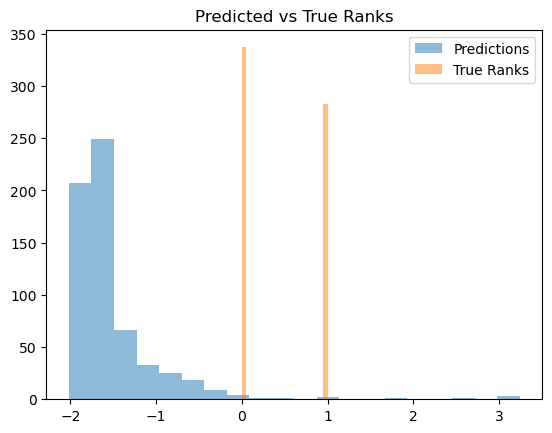

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Feature Importance
feature_importance = model.get_score(importance_type='weight')
print("Feature Importances: ")
print(feature_importance)

# Prediction vs True Ranks Histogram
plt.hist(y_pred, bins=20, alpha=0.5, label='Predictions')
plt.hist(y_test, bins=20, alpha=0.5, label='True Ranks')
plt.legend(loc='upper right')
plt.title('Predicted vs True Ranks')
plt.show()

